In [3]:
import glob
import cv2 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import imutils
import copy
from scipy.ndimage.filters import  gaussian_filter
import math
import skimage.transform as sktr


### Fourier

In [17]:

def pattern_remover(img,p=0.65,center=25,p_max=1):
    img = img.copy()
    dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude, angle = cv2.cartToPolar(dft_shift[:, :, 0],dft_shift[:, :, 1])
    magnitude = np.log(magnitude)
    i_magnitude = np.exp(magnitude)
    i_dft_shift = cv2.polarToCart(i_magnitude,angle*(-1))
    i_dft_shift = np.stack([i_dft_shift[0],i_dft_shift[1]],axis=2)
    i_dft_shift = np.fft.ifftshift(i_dft_shift)
    i_dft = cv2.idft(i_dft_shift, flags=cv2.DFT_SCALE)
    out4 = cv2.magnitude(i_dft[:,:,0],i_dft[:,:,1])
    
    return out4


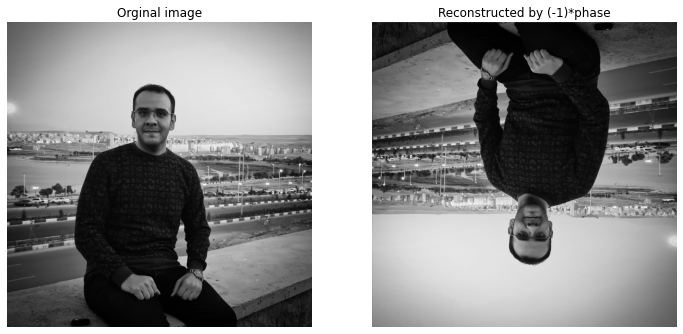

In [21]:
plt.rcParams['figure.figsize'] = [6, 6]
img = cv2.imread("./mohsen.jpg",0)
plt.subplot(1,2,1)
plt.imshow(img,cmap="gray")
plt.axis("off")
plt.title("Orginal image")

plt.subplot(1,2,2)
plt.imshow(pattern_remover(img),cmap="gray")
plt.axis("off")
plt.title("Reconstructed by (-1)*phase")
plt.show()

